In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('manufacturing.csv')
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.21707,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.76500,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.95025,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.88155,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.20128,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.96390,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.85724,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.69095,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.98553,9.134036e+06,99.999975


In [3]:
#check for datatypes
df.dtypes

Temperature (°C)                  float64
Pressure (kPa)                    float64
Temperature x Pressure            float64
Material Fusion Metric            float64
Material Transformation Metric    float64
Quality Rating                    float64
dtype: object

In [4]:
#process      
#step1 :Check for null values (Compulsary)
df.isnull().sum()/df.shape[0]*100

Temperature (°C)                  0.0
Pressure (kPa)                    0.0
Temperature x Pressure            0.0
Material Fusion Metric            0.0
Material Transformation Metric    0.0
Quality Rating                    0.0
dtype: float64

<Axes: >

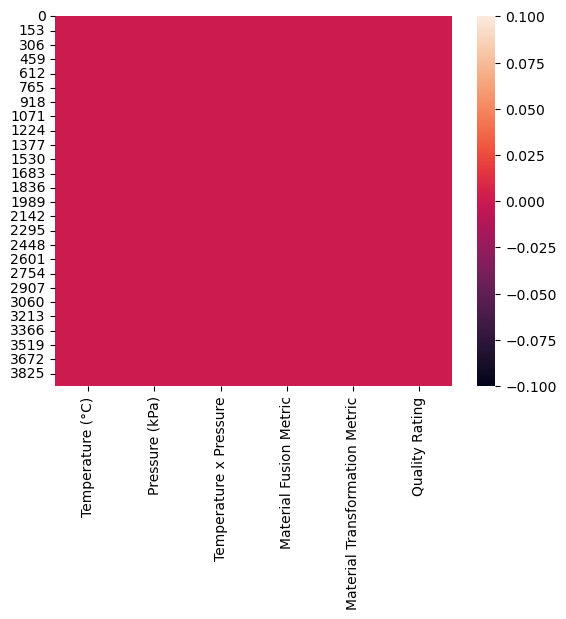

In [5]:
#heatmap for checking null values
sb.heatmap(df.isnull())

In [6]:
X=df.drop('Quality Rating',axis=1) #input Temperature (°C) 	Pressure (kPa) 	Temperature x Pressure 	Material Fusion Metric 	Material Transformation Metric 	
Y=df['Quality Rating'] #oouput Qualit Rating

In [7]:
#lets import Train_Test_split from model_selecion
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1) #70% training 30%testing

In [9]:
X_train.shape

(2769, 5)

In [10]:
X_test.shape

(1188, 5)

In [11]:
Y_train.shape

(2769,)

In [12]:
Y_test.shape

(1188,)

In [13]:
#lets give the data to the matchine by overfitting it into same unit
#we use scaling for xtrain and xtest
#scaling we us on input type of data
#it will convert the data into numpy .arraay
from sklearn.preprocessing import StandardScaler
#create an object for the standardScalar
ss=StandardScaler()
#applying scaling on X_train we use fit_transform()
X_train=ss.fit_transform(X_train)

In [14]:
X_train

array([[ 0.51429399,  0.13976946,  0.43702498,  0.36136844,  0.28109401],
       [-0.68810112, -0.88543829, -0.9626283 , -0.90738588, -0.78548443],
       [-0.90104386,  0.02947367, -0.51087117, -0.966401  , -0.90193813],
       ...,
       [-1.66864828,  0.82962044, -0.6442982 , -1.26566792, -1.18342619],
       [-0.27035036, -1.18784396, -1.02082984, -0.57197065, -0.49908504],
       [-0.29109922,  0.07326837, -0.11388011, -0.46493896, -0.51527464]])

In [15]:
#applying scaling on X_test we use transform()
X_test=ss.transform(X_test)

In [16]:
X_test

array([[ 1.02074303,  0.52763937,  1.15110142,  1.04634062,  0.98161415],
       [-1.2880149 ,  1.77270659,  0.12071375, -0.71524504, -1.06864625],
       [ 0.95357975, -1.55562993, -1.00204662,  0.73393824,  0.87892475],
       ...,
       [-1.44896532,  0.82122397, -0.4761803 , -1.15015643, -1.12260269],
       [ 0.76180216, -0.23582938,  0.22852036,  0.59194662,  0.60243727],
       [-1.69224796,  1.01807006, -0.5869554 , -1.22280038, -1.18914279]])

In [17]:
#performing the model with linear Regression 
#we have to import Linear Regression from Linear_Model
from sklearn.linear_model import LinearRegression

In [18]:

#create an object for linearRegression
lr=LinearRegression()

In [19]:
#lets train the model with 70% of data

#we use .fit() method of linearRegression class
lr.fit(X_train,Y_train)

LinearRegression()

In [20]:
#lets check for slope/gradient  for Tv and radio input
lr.coef_

array([ 15.05134755,  -3.02750221,   0.52944195,  15.34472562,
       -37.45730935])

In [21]:
#lets check for intercept/Constant
lr.intercept_

96.21896437108379

In [22]:
#slope:- Changes in Y divided by changes in X (y2-y1 /  x2-x1)

#intercept :- The Best fit line touching a point on y-axis is called an intercept


In [23]:
#lets test the data model with 30% of data
#we will use the inbuilt method : Predict() of LinearRegression
#predict y=mx+c
#predicted output
ypred=lr.predict(X_test)

In [24]:
ypred

array([ 89.88171926, 100.58301644,  93.09069693, ...,  96.07255776,
        95.03765491,  93.13393715])

In [25]:
#lets create  a dictionary for understanding 
dict={"Actual output":Y_test,"Predict output":ypred}
df1=pd.DataFrame(dict)
df1

,Actual output,Predict output
2282,99.748434,89.881719
1128,100.000000,100.583016
719,99.866902,93.090697
3714,100.000000,105.610597
1882,100.000000,99.080375
...,...,...
2874,100.000000,104.185329
499,99.999995,104.020473
303,100.000000,96.072558
926,99.979560,95.037655


In [26]:
#mse #mean square error aslo called as  #loss function #cost function # To check the error 

from sklearn.metrics import mean_squared_error

In [27]:
#NOW we have to check or error in the model  
#checking for mean squared_error
mse=mean_squared_error(Y_test,ypred)
print("mean square error",mse)

mean square error 82.2202321692707


In [28]:
#lets check for mean_sqaured_error #check for root of mean square  :--- error minmize error
rmse=np.sqrt(mse)
rmse

9.067537271457487

In [29]:
#RSS :- Residual sum of Squared(EACH AND EVERY POINT) formula(ytest-ypred)  mse=RSS/N N=no of datapoints
from sklearn.metrics import r2_score

In [30]:
#R2_score =TSS-RSS/TSS   TSS(TOTAL SUM OF SQUARED) ON OUTPUT COLUMN  (OUTPUT OF MEAN) POINTS LAYING ON Y AXIS , MEAN OF Y
# Hortional line parrellel to your input

In [31]:
# R2_score=(TSS-RSS)/TSS
# y_mean:- IT will create a parallel line an according to mean with respect to your  input
# TSS is always greater then RSS TSS>RSS
# Assurity: 0.9 and above, but if is not 0.9 and greater then it might underfit or overfit 
# Range of R2_score :0 to 1 +1 
# thresshold value =0.5  greater than 0.5 model is good . 
# LEsser than 0.5 not good

# eg TSS=80 ,RSs=60
# Rscore=(80-60)/80
#       =20/80
# Rscore=0.25 =25%


In [32]:
#checking for the score of model  : r2_score   0 to +1
#use inbuilt function r2_score which is defined in r2_score

In [33]:
print('r2 score is ',r2_score(Y_test,ypred))

r2 score is  0.507643169151538


In [34]:
#asummption 
# 1] Input and output are in linear Regression (upward or downward)
# 2] If relation is linear then data point should be homoskedastik(closed datapoints), 
#      but it should not be hetroskedastik(far datapoints)
# 3]  but it should not be multicolinearity (input input not relation)
# 4] it should make normal distributed curve on both the sides,skewness:(to find the closeness):it should be close to zero or zero


In [35]:
residual_error=Y_test-ypred

In [36]:
#score is 92% it excellent but....
#checking for assumption 1: There should be linear Relation between input and output 

residual_error

2282    9.866715
1128   -0.583016
719     6.776205
3714   -5.610597
1882    0.919625
          ...   
2874   -4.185329
499    -4.020478
303     3.927442
926     4.941906
3318    6.866063
Name: Quality Rating, Length: 1188, dtype: float64

In [37]:
import matplotlib.pyplot as plt

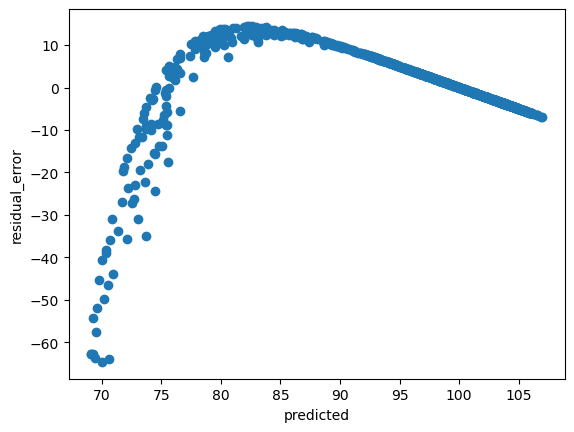

In [38]:
#visualising the data points into scatterplot betweeen input y_pred and output output residual error
#IN the above plot there is not relation between :input and output
#there is no relation between input(Tv and Radio) and output(sales) means it is non-linear 
#first assumption is not fulfullid or first assumption is failed 

plt.scatter(ypred,residual_error)
plt.xlabel('predicted')
plt.ylabel("residual_error")
plt.show()

In [39]:
#2nd assumption :It realtion is linear ,Then we have to check for wether the data points are homeskedastik 
#but it hould not be heterostkedastik
#If we fail to fulfilled first assumptionbut  the second assumption is pass  data points are homeskedastik  because it sort relation between input and output
# between input and output 

<Axes: >

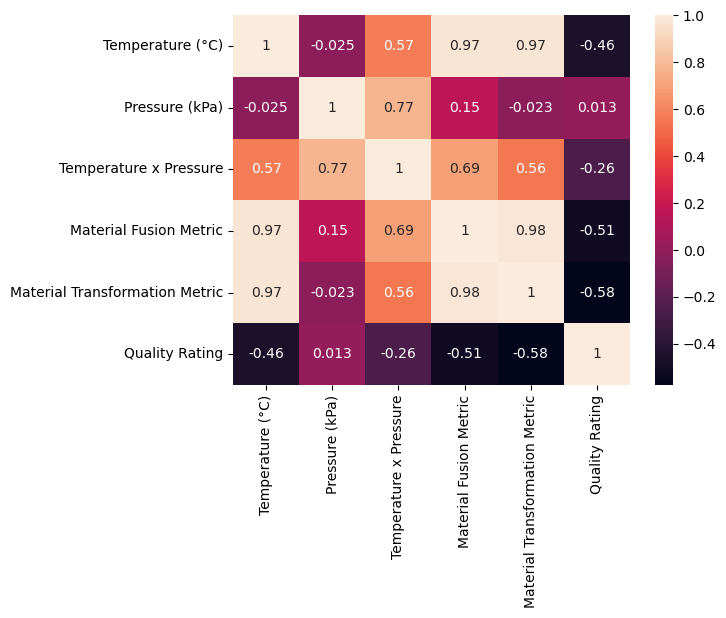

In [40]:
sb.heatmap(df.corr(),annot=True)

In [41]:
# 3 assumption is based on Multicolinearity all input are important

In [42]:
#4 assumption :residudal error should be normally distributed
#it means that  data should be equally distributed on both the the sides.
#it means that skewnes should be close to zero or zero

<Axes: xlabel='Quality Rating', ylabel='Count'>

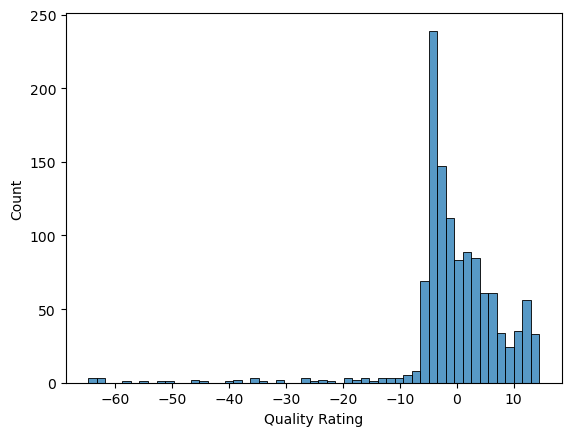

In [43]:
sb.histplot(residual_error)

<Axes: xlabel='Quality Rating', ylabel='Density'>

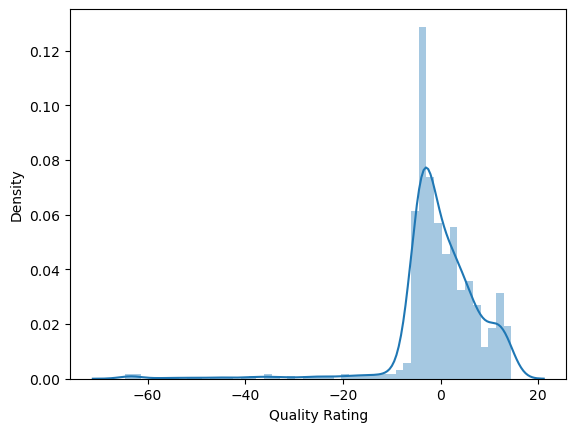

In [44]:
sb.distplot(residual_error,hist=True)

<Axes: xlabel='Quality Rating', ylabel='Density'>

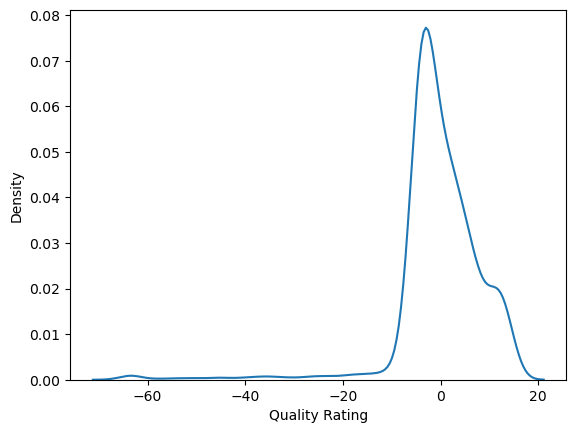

In [45]:
sb.distplot(residual_error,hist=False) #left skewed

In [46]:
print(residual_error.skew()) #skew should be close to zero but the skewness is quit big  hence diagram is negativel skewed

-3.0300152082608545


In [47]:
lr.score(X_train,Y_train)

0.5050372670346273

In [48]:
lr.score(X_test,Y_test)

0.507643169151538

<Axes: >

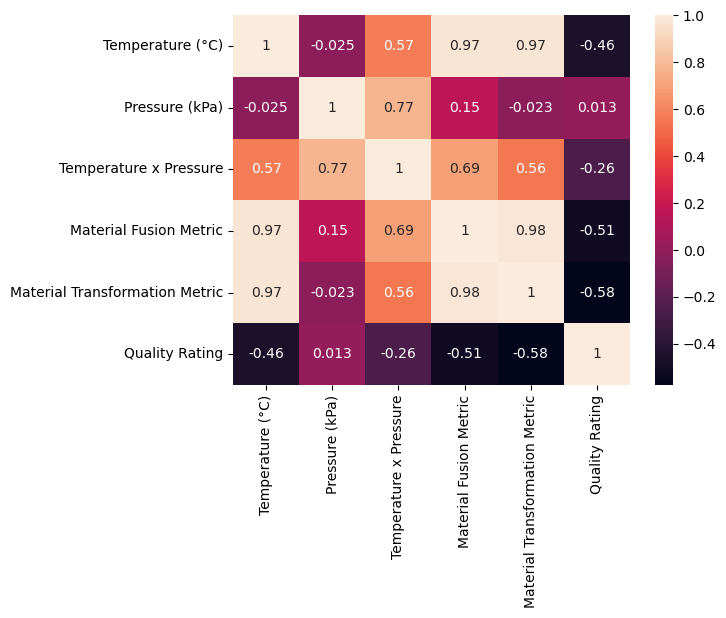

In [49]:
sb.heatmap(df.corr(),annot=True) #multicolinearity graph

In [50]:
#Polynomial Linear Regresssion   #because 4 mei ase 3 assumption full nahi hu

#This dataset is an polynomial linear Regression
#we will increase the degree on input(X) X=7 it is quadratic equation 
from sklearn.preprocessing import PolynomialFeatures

In [51]:
#increasing the degree of input x, so call polynomial features 
#create an object  for Polynomial Features
pl=PolynomialFeatures(7)

In [52]:
X_poly=pl.fit_transform(X)

In [53]:
#now we will train the dat with 70% and tses it will 30%
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [54]:
X_train.shape

(2769, 792)

In [55]:
X_test.shape

(1188, 792)

In [56]:
Y_train.shape

(2769,)

In [57]:
Y_test.shape

(1188,)

In [58]:
X_train=ss.fit_transform(X_train)

In [59]:
X_test=ss.transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [62]:
lr.coef_

array([-6.07427586e+08, -5.28262532e+05, -1.25060855e+04,  1.04912249e+06,
        4.70810941e+06,  2.47154462e+07,  4.11550518e+06, -7.51538461e+05,
        6.66454522e+06, -8.73341240e+07, -9.97531699e+07, -6.45801395e+03,
       -5.36310037e+06, -7.39544246e+06,  1.11229519e+07, -9.03220104e+06,
        1.17426334e+07,  4.12165154e+05,  1.42154076e+08, -1.43930309e+08,
        5.07020443e+08, -1.08385546e+07, -3.49311715e+06, -1.13396193e+07,
        1.66740904e+08, -1.46804658e+08,  4.94637780e+06, -7.74408267e+06,
        1.39728935e+07,  1.16178299e+07,  9.34239225e+06, -2.96849743e+07,
        1.75852256e+07, -3.24337380e+08,  4.36710326e+08, -9.19948028e+08,
       -6.29794890e+05,  5.90968611e+06,  2.75591919e+07, -6.97421055e+07,
       -4.34770579e+06,  1.06353204e+07,  7.36204557e+07, -1.93460751e+07,
       -1.33879221e+06, -5.96805777e+07,  4.38411261e+07, -1.75752363e+07,
       -3.40448127e+07,  1.05695312e+07, -1.10325792e+07, -4.82887469e+07,
        3.08671476e+08, -

In [63]:
lr.intercept_

96.21897057150002

In [64]:
ypred=lr.predict(X_test)
ypred

array([99.74845985, 99.99988822, 99.86668948, ..., 99.99994877,
       99.97958675, 99.99976472])

In [65]:
dict={"Actual ouput ":Y_test,"predicted output":ypred}
df2=pd.DataFrame(dict)
df2

,Actual ouput,predicted output
2282,99.748434,99.748460
1128,100.000000,99.999888
719,99.866902,99.866689
3714,100.000000,100.000131
1882,100.000000,100.000039
...,...,...
2874,100.000000,99.999851
499,99.999995,99.999840
303,100.000000,99.999949
926,99.979560,99.979587


In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
print("mean squared error",mean_squared_error(Y_test,ypred))

mean squared error 2.971006949226784e-08


In [68]:
mse=mean_squared_error(Y_test,ypred)

In [69]:
rmse=np.sqrt(mse)
rmse

0.00017236609148051085

In [70]:
from sklearn.metrics import r2_score

In [71]:
print("r2 score",r2_score(Y_test,ypred)) #r2core is quite good

r2 score 0.9999999998220881


In [72]:
residual_error=Y_test-ypred
residual_error

2282   -0.000026
1128    0.000112
719     0.000213
3714   -0.000131
1882   -0.000039
          ...   
2874    0.000149
499     0.000155
303     0.000051
926    -0.000026
3318    0.000235
Name: Quality Rating, Length: 1188, dtype: float64

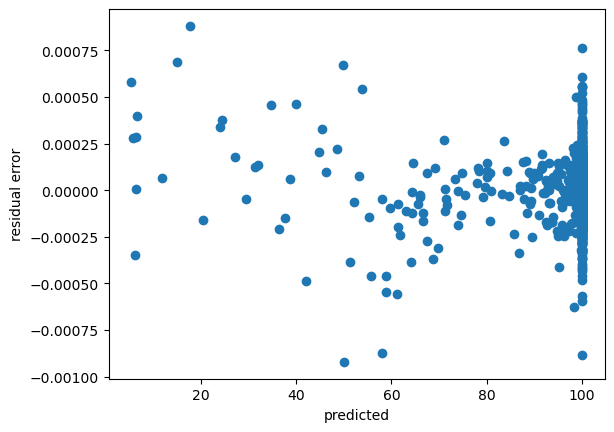

In [73]:
plt.scatter(ypred,residual_error) #first assumption is also passed  and 2 assumption is passes because it homoskadastic(close data point)

plt.ylabel("residual error")
plt.xlabel("predicted")
plt.show()

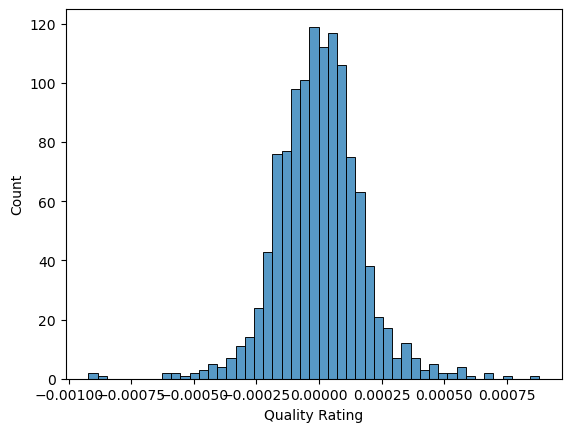

In [74]:
sb.histplot(residual_error)
plt.show()

<Axes: xlabel='Quality Rating', ylabel='Density'>

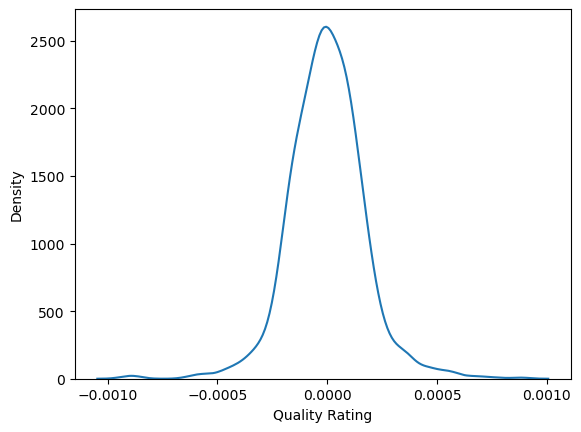

In [75]:
sb.distplot(residual_error,hist=False)

<Axes: xlabel='Quality Rating', ylabel='Density'>

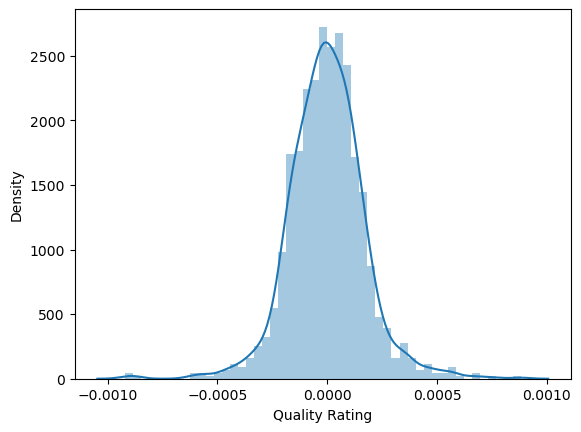

In [76]:
sb.distplot(residual_error,hist=True)

In [77]:
print(residual_error.skew()) #skewneses is close it zero #hence is is normal distributed

0.016924564582960804


In [78]:
lr.score(X_train,Y_train) #hence it use to check training and testting score wtether we have to perfrom regularisation

0.9999999998747446

In [79]:
lr.score(X_test,Y_test)

0.9999999998220881

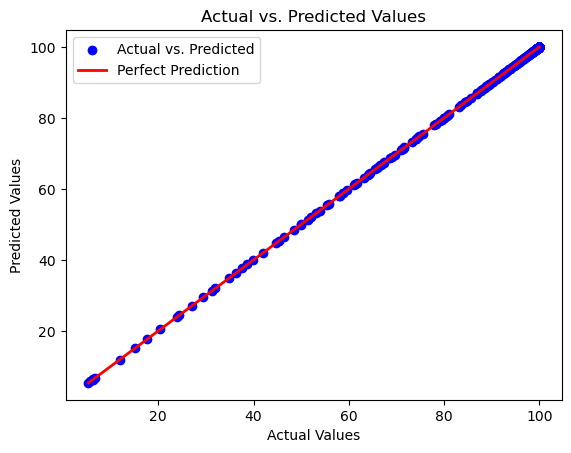

In [80]:
import matplotlib.pyplot as plt

# # Assuming y_actual contains the actual output values, and y_pred contains the predicted output values
# y_actual = [actual_value1, actual_value2, ...]  # Replace with your actual values
# y_pred = [predicted_value1, predicted_value2, ...]  # Replace with your predicted values

# Create a scatter plot to compare predicted vs. actual values
plt.scatter(Y_test, ypred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# # Add a diagonal line for reference (y = x)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()
